# Explore here

Top 3 canciones por popularidad creciente:
  Track Name  Popularity  Duration (min)
1   She Will          75            5.10
9  Headlines          77            3.93
6   CN TOWER          78            4.03


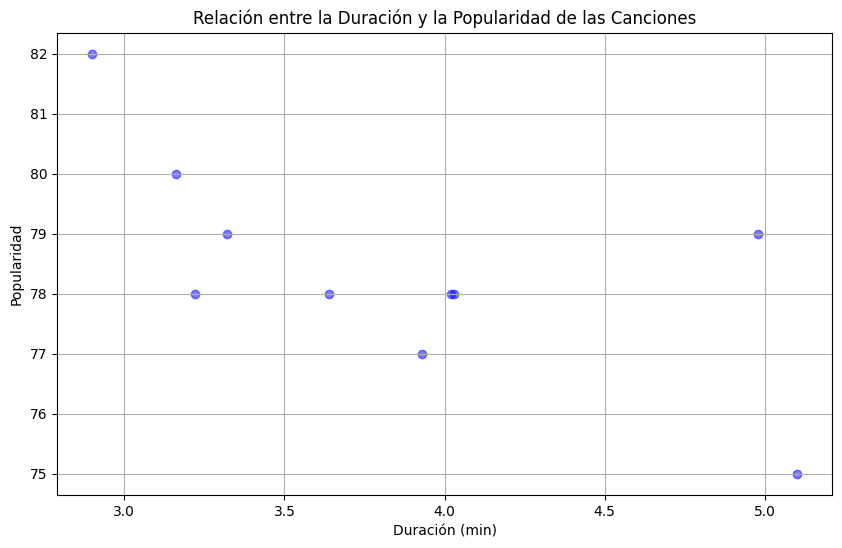

Correlación entre la duración y la popularidad: -0.68


In [ ]:
import os
import pandas as pd
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
import seaborn as sns
import json

# load the .env file variables
load_dotenv()

client_id = "54b181696e904588b52b19816cae88a5"
client_secret = "5a296acc456b4476a59428a718d3b83e"

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

# URL del artista y extracción del ID del artista
artist_url = "https://open.spotify.com/intl-es/artist/3TVXtAsR1Inumwj472S9r4"
artist_id = artist_url.split('/')[-1]

# Obtener el top 10 de canciones del artista y almacenar la información relevante
top_tracks = sp.artist_top_tracks(artist_id)['tracks'][:10]
tracks_info = [{
    'Track Name': track['name'],
    'Popularity': track['popularity'],
    'Duration (min)': round(track['duration_ms'] / 60000, 2)  # Convertir milisegundos a minutos y redondear
} for track in top_tracks]

# Convertir la lista a un DataFrame de pandas
df_tracks = pd.DataFrame(tracks_info)

# Convertir el DataFrame a JSON
json_data = df_tracks.to_json(orient='records')

# Guardar el JSON en un archivo
with open('tracks_info.json', 'w') as f:
    json.dump(json_data, f, indent=4)

# Ordenar las canciones por popularidad creciente y mostrar el top 3 resultante
df_top_3 = df_tracks.sort_values(by='Popularity', ascending=True).head(3)
print("Top 3 canciones por popularidad creciente:")
print(df_top_3)

# Crear el scatter plot para analizar la relación entre la duración y la popularidad
plt.figure(figsize=(10, 6))
plt.scatter(df_tracks['Duration (min)'], df_tracks['Popularity'], color='blue', alpha=0.5)
plt.title('Relación entre la Duración y la Popularidad de las Canciones')
plt.xlabel('Duración (min)')
plt.ylabel('Popularidad')
plt.grid(True)
plt.show()

# Análisis estadístico de la relación entre duración y popularidad
correlation = df_tracks['Duration (min)'].corr(df_tracks['Popularity'])
print(f"Correlación entre la duración y la popularidad: {correlation:.2f}")